# Supplementary Figures for *Luo et al. 2021*

(*A high-resolution HLA reference panel capturing global population diversity enables multi-ethnic fine-mapping in HIV host response*)


**Code for reproducing supplementary figures in the manuscript**

For any question please contact the first and corresponding author Yang Luo: yangluo@broadinstitute.org

## loading up libraries and presettings

In [1]:
#Load libraries
suppressPackageStartupMessages({
    library(ggplot2)
    library(reshape2)
    library(reticulate)
    library(repr)
    library(patchwork)
    library(plyr)
    library(scales)
    library(RColorBrewer)
    library(dplyr)
    library(data.table)
    library(ggthemes)
    library(ggsci)
    library(rsvd)
    library(tidyr)
    library(ggrepel)
    library(umap)
    library(gridExtra)
    library(cowplot)
    library(plotrix)
    library(ggpubr)
    library(grid)
    library(corrplot)
    library(stringr)
})

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
Warning message:
“package ‘reshape2’ was built under R version 3.6.2”
Warning message:
“package ‘reticulate’ was built under R version 3.6.2”
Warning message:
“package ‘patchwork’ was built under R version 3.6.2”
Warning message:
“package ‘scales’ was built under R version 3.6.2”
Warning message:
“package ‘dplyr’ was built under R version 3.6.2”
Warning message:
“package ‘tidyr’ was built under R version 3.6.2”
Warning message:
“package ‘umap’ was built under R version 3.6.2”
Warning message:
“package ‘cowplot’ was built under R version 3.6.2”
Warning message:
“package ‘plotrix’ was built under R version 3.6.2”
Warning message:
“package ‘ggpubr’ was built under R version 3.6.2”


In [107]:
# set global plotting parameters
theme_set(theme_classic() + theme(text = element_text(size=20, family = "sans")))

options(repr.plot.width = 10, repr.plot.height = 7)

#pop_colors <- c("black", "#E69F00","#56B4E9","#D55E00","#009E73")
pop_colors <- c("#938dd2","#E69F00" ,"#56B4E9","#D55E00","#009E73")

pop_labels <- c("Admixed African","East Asian","European","Latino", "South Asian")

#Calc color palette (discrete)
gene_colors <- c("A"="#004586", "B" = "#ff420e", "C"="#ffd320", 
                 "DQA1" = "#579d1c", "DQB1" = "#7e0021", "DRB1" = "#83caff","DPA1" = "#314004", "DPB1" = "#aecf00"  )

#panel colors
panel_colors <- c("darkorchid4", "plum","darkorange")
panel_names <- c("Multi-ethnic WGS (21,546)","Multi-ethnic WGS (5,225)","T1DGC (5,225)"
                                      )

## HLA-LA typing accuracy (SF1)

In [3]:
allele.summary <- read.table("../data/Ggroup_allele_summary.txt.gz",h=T,stringsAsFactors = F)

allele.summary$Gene <- sapply(strsplit(allele.summary[,1], "\\*"), "[[", 1)

### Japanese inferred G-group accuracy (N = 288) (SF1a)

[1] 85 13

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_text_repel).”


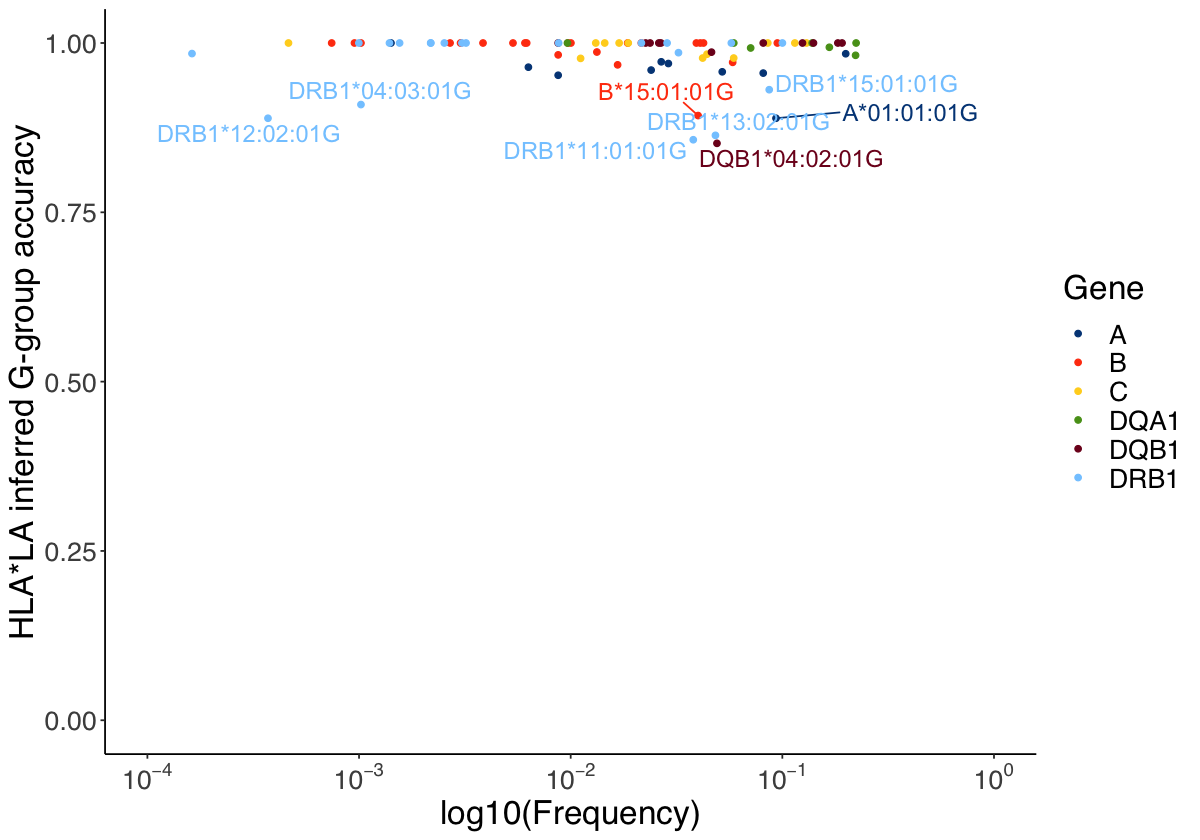

In [4]:
jpn <- allele.summary[!is.na(allele.summary$JPNaccuracy),]
jpn$label <- ifelse(jpn$JPNaccuracy<0.95,jpn$Allele,"")

gold_standard <- read.table("../data/JPN_gold_standard_Ggroups.txt",h=F)
gs.n <- unique(c(gold_standard[,7:22])) %>% unlist() %>% table() %>% as.data.frame()
names(gs.n) <-  c("Allele","n")

jpn$n <- gs.n[match(jpn$Allele,gs.n$Allele),2]
df <- jpn %>% filter(n>=5)
dim(df)
p <- ggplot(df,aes(x=log10(Freq),y=JPNaccuracy,label=label, color=Gene)) + geom_point() 

p <- p + ylab("HLA*LA inferred G-group accuracy") + ylim(0,1)+
 scale_x_continuous(name = "log10(Frequency)",breaks=c(-4,-3, -2, -1,0),limits=c(-4,0),
                       labels=c(expression(10^-4),expression(10^-3),expression(10^-2),expression(10^-1),expression(10^0)))

p + geom_text_repel(size=5, show.legend = FALSE) + scale_colour_manual( values = gene_colors)
ggsave("../figs/SF1a_JPN_HLA_LA_accuracy.pdf",width=10,height=7)

### HLA*LA typing accuracy in 1KG (SF1b)

Warning message:
“Removed 14 rows containing missing values (geom_point).”
Warning message:
“Removed 14 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 14 rows containing missing values (geom_point).”
Warning message:
“Removed 14 rows containing missing values (geom_text_repel).”


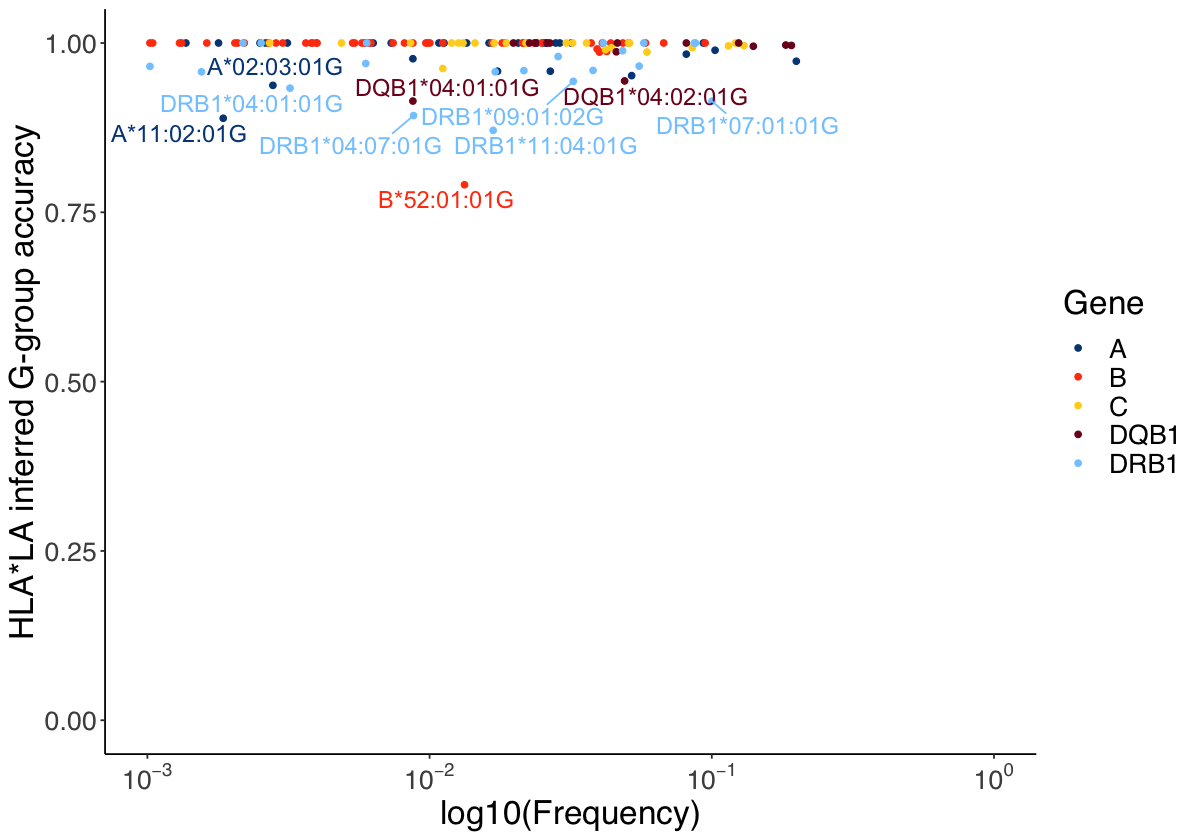

In [5]:
g1k <- allele.summary[!is.na(allele.summary$G1Kaccuracy),]
g1k$label <- ifelse(g1k$G1Kaccuracy<0.95,g1k$Allele,"")

g1k.goldstandard.ggroup <- read.table("../data/G1k_gold_standard_Ggroups.txt",header = T,stringsAsFactors = F)

gs.n <- unique(c(g1k.goldstandard.ggroup[,2:10])) %>% unlist() %>% table() %>% as.data.frame()

names(gs.n) <-  c("Allele","n")

g1k$n <- gs.n[match(g1k$Allele,gs.n$Allele),2]
df <- g1k %>% filter(n>=5)

p <- ggplot(df,aes(x=log10(Freq),y=G1Kaccuracy,label=label, color=Gene)) + geom_point() 

p <- p + ylab("HLA*LA inferred G-group accuracy")+ ylim(0,1) + 
 scale_x_continuous(name = "log10(Frequency)",breaks=c(-3, -2, -1,0),limits = c(-3,0),
                       labels=c(expression(10^-3),expression(10^-2),expression(10^-1),expression(10^0)))

p + geom_text_repel(size=5, show.legend = FALSE) +
    scale_colour_manual(values = gene_colors)

ggsave("../figs/SF1b_G1K_HLA_LA_accuracy.pdf",width=10,height=7)



## GAP PCA (SF2)

In [6]:
gap.pc <- data.frame(read.table("../data/GAPPCs.eigenvec", header = F, stringsAsFactors = F))

sampleInfo <- read.table("../data/g1k_samples.txt",header = T, stringsAsFactors = F )

gap.pc$Ethnicity <- sampleInfo[match(gap.pc$V2,sampleInfo$sample),]$super_pop
gap.pc[is.na(gap.pc$Ethnicity),]$Ethnicity <- "zgap"

selectedGAP <- scan("../data/gap_validation_samples.txt",as.character())

gap.pc$selected <- ifelse(gap.pc$V2 %in% selectedGAP,1,0)

gap.pc[gap.pc$selected==1,]$Ethnicity <- "zgap_picked"
sum(gap.pc$selected)

table(gap.pc$Ethnicity)
pop_labels
gap.pc$Ethnicity <- factor(gap.pc$Ethnicity, levels = c("AFR","EAS","EUR","AMR","SAS","zgap","zgap_picked"))

[1] 75


        AFR         AMR         EAS         EUR         SAS        zgap 
        661         347         504         503         489        2163 
zgap_picked 
         75 

[1] "Admixed African" "East Asian"      "European"        "Latino"         
[5] "South Asian"

[1] "Admixed African" "East Asian"      "European"        "Latino"         
[5] "South Asian"

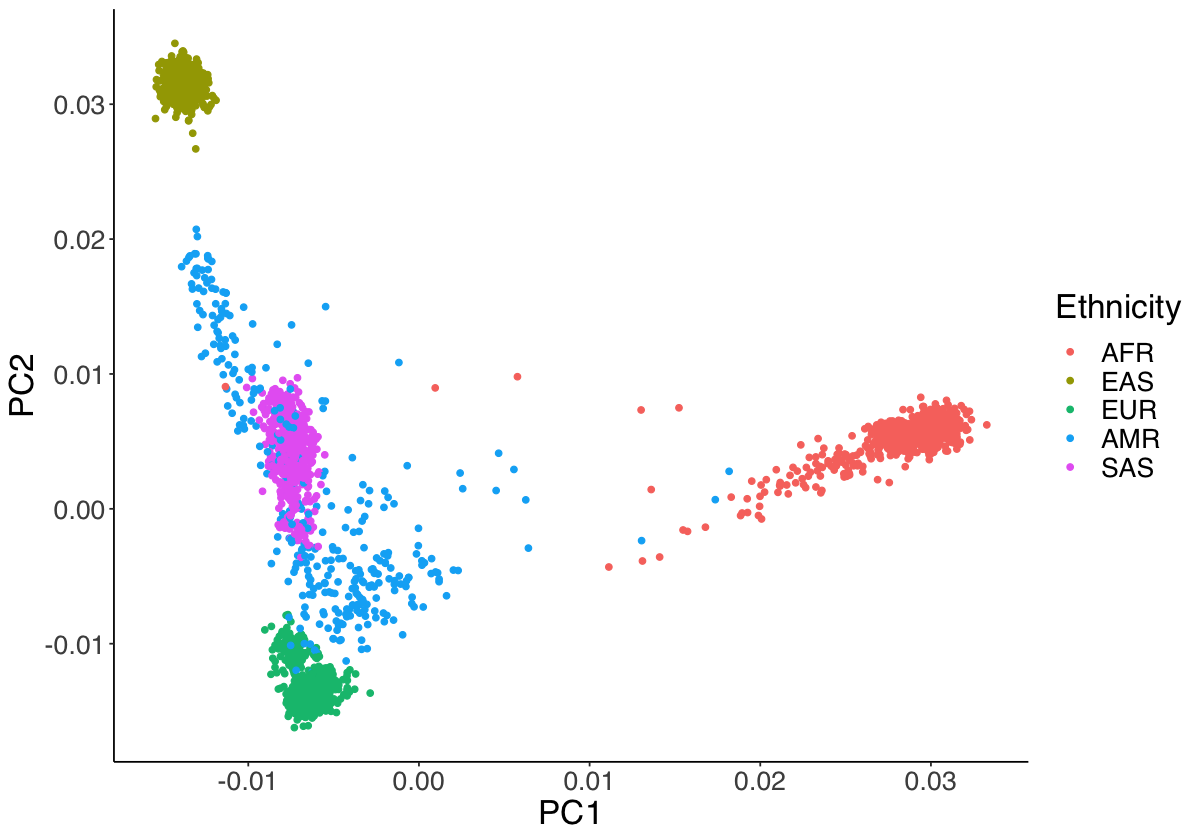

ERROR: Error in row.names(ibd): object 'ibd' not found


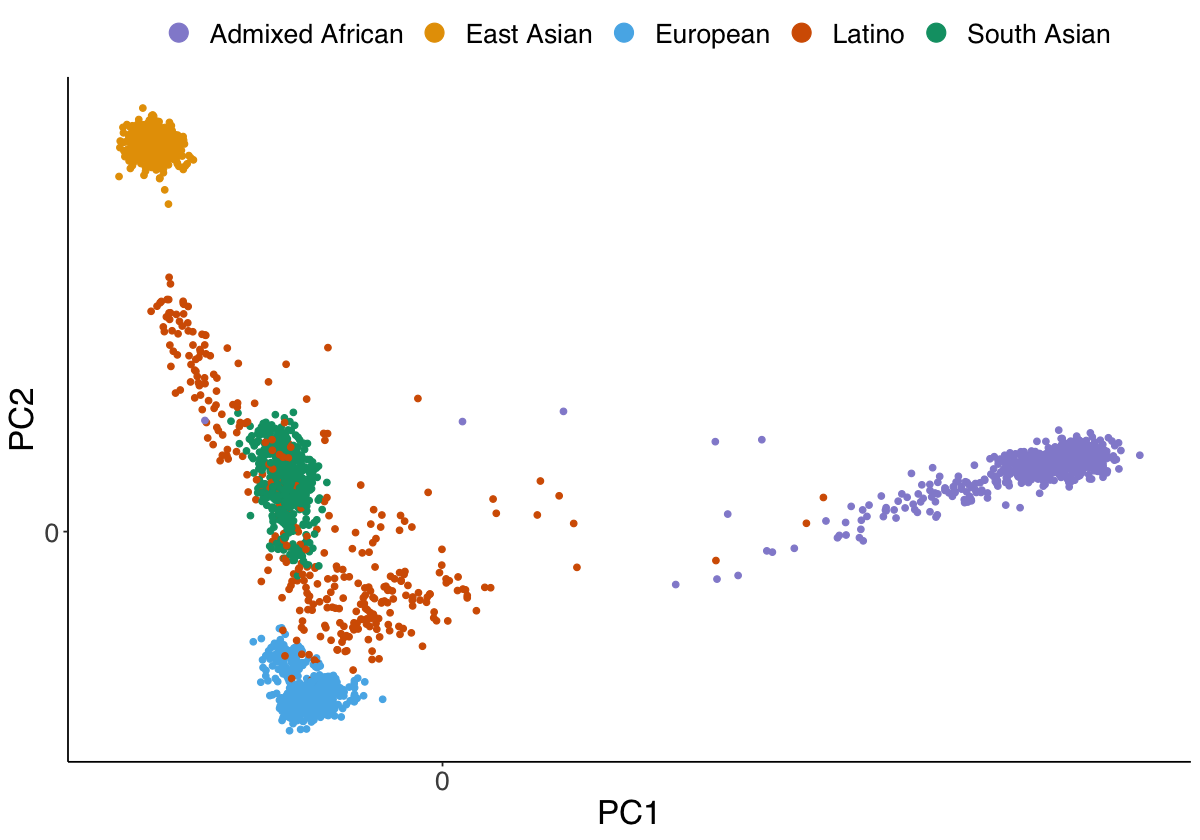

In [7]:
GAP.pc.plt <- ggplot(gap.pc%>% filter(Ethnicity != "zgap" & selected !=1),aes(x=V3,y=V4,color=Ethnicity))+
  geom_point()+xlab("PC1")+ylab("PC2") 
GAP.pc.plt
pop_labels
GAP.pc.plt <- GAP.pc.plt +
  scale_color_manual(name = "",values=c(pop_colors),
                     labels=c(pop_labels))
GAP.pc.plt <- GAP.pc.plt + theme(legend.position="top", 
                        plot.background=element_blank(),
                        text = element_text(family = "sans")) 

gap.pc12 <- GAP.pc.plt + scale_x_continuous(breaks = 0) + scale_y_continuous(breaks = 0)
gap.pc12+ guides(color = guide_legend(override.aes = list(size = 5)))

ggsave("~/presentations/jobs//g1k_pcs.pdf",width=9,height=9)


dfplt$ancestry <- sampleInfo[match(row.names(ibd),sampleInfo$sample),]$super_pop

dfplt[dfplt$ancestry=="AMR",]$ancestry <- "LAT"
g1k.pc.plt <- ggplot(dfplt,aes(V1,V2,colour=ancestry))+geom_point()
g1k.pc.plt <- g1k.pc.plt + scale_color_manual(values = pop_colors,
                                              name="",labels=c(pop_labels)) + 
    xlab("PC1")+ylab("PC2")


g1k.pc.plt <- g1k.pc.plt + theme(legend.position="top",
                        plot.background=element_blank(),
                        text = element_text(family = "sans")) 

g1k.pc.plt + scale_x_continuous(breaks = 0) + scale_y_continuous(breaks = 0)+ guides(color = guide_legend(override.aes = list(size = 5)))
ggsave("~/presentations/jobs//g1k_mhc_pcs.pdf",width=9,height=9)


In [12]:
GAP.pc.plt <- ggplot(gap.pc,aes(x=V3,y=V4,color=Ethnicity))+
    geom_point(data = gap.pc %>% filter(Ethnicity != "zgap"),  alpha = 0.6)+
    geom_point(data = gap.pc %>% filter(Ethnicity == "zgap"),  alpha = 0.4) +
    geom_point(data = gap.pc %>% filter(selected == 1),  alpha = 1, color="red") +
  xlab("PC1")+ylab("PC2") 

GAP.pc.plt <- GAP.pc.plt +
  scale_color_manual(name = "",values=c(pop_colors[c(1,4,2,3,5)],"pink","red"),
                     labels=c(pop_labels[c(1,4,2,3,5)],"GAP GWAS", "Selected GAP samples"))
GAP.pc.plt <- GAP.pc.plt + theme(legend.position="top",
                        plot.background=element_blank(),
                        text = element_text(family = "sans")) 

gap.pc12 <- GAP.pc.plt + scale_x_continuous(breaks = 0) + scale_y_continuous(breaks = 0)

GAP.pc.plt <- ggplot(gap.pc,aes(x=V3,y=V5,color=Ethnicity))+
    geom_point(data = gap.pc %>% filter(Ethnicity != "zgap"),  alpha = 0.6)+
    geom_point(data = gap.pc %>% filter(Ethnicity == "zgap"),  alpha = 0.4) +
    geom_point(data = gap.pc %>% filter(selected == 1),  alpha = 1, color="red") +
  xlab("PC1")+ylab("PC3") +
  scale_color_manual(name = "",values=c(pop_colors[c(1,4,2,3,5)],"pink","red"),
                     labels=c(pop_labels[c(1,4,2,3,5)],"GAP GWAS", "Selected GAP samples"))
GAP.pc.plt <- GAP.pc.plt + theme(legend.position="top",
                        plot.background=element_blank(),
                        text = element_text(family = "sans")) 

gap.pc13 <- GAP.pc.plt + scale_x_continuous(breaks = 0) + scale_y_continuous(breaks = 0)

g_legend<-function(a.gplot){
  tmp <- ggplot_gtable(ggplot_build(a.gplot))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)}

mylegend<-g_legend(gap.pc12)

prow <- plot_grid( gap.pc12 + theme(legend.position="none"),
           gap.pc13 + theme(legend.position="none"),
           align = 'vh',
           labels = c("(a)", "(b)"),
           hjust = -1,
           nrow = 1
           )
pdf("../figs/SF2_GAP-PCA.pdf", height = 7, width = 10)
 
p <- plot_grid( mylegend, prow,  ncol = 1, rel_heights = c( .2,1))
p
dev.off()

pdf 
  2

## GaP imputation accuracy (SF3)

In [104]:
acc.Ggroup <- read.table("../data/gap_Ggroup_accuracy.txt",h=T,stringsAsFactors = F)

`summarise()` ungrouping output (override with `.groups` argument)

Warning message in melt(gene.accuracy):
“The melt generic in data.table has been passed a tbl_df and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(gene.accuracy). In the next version, this warning will become an error.”
Using gene as id variables



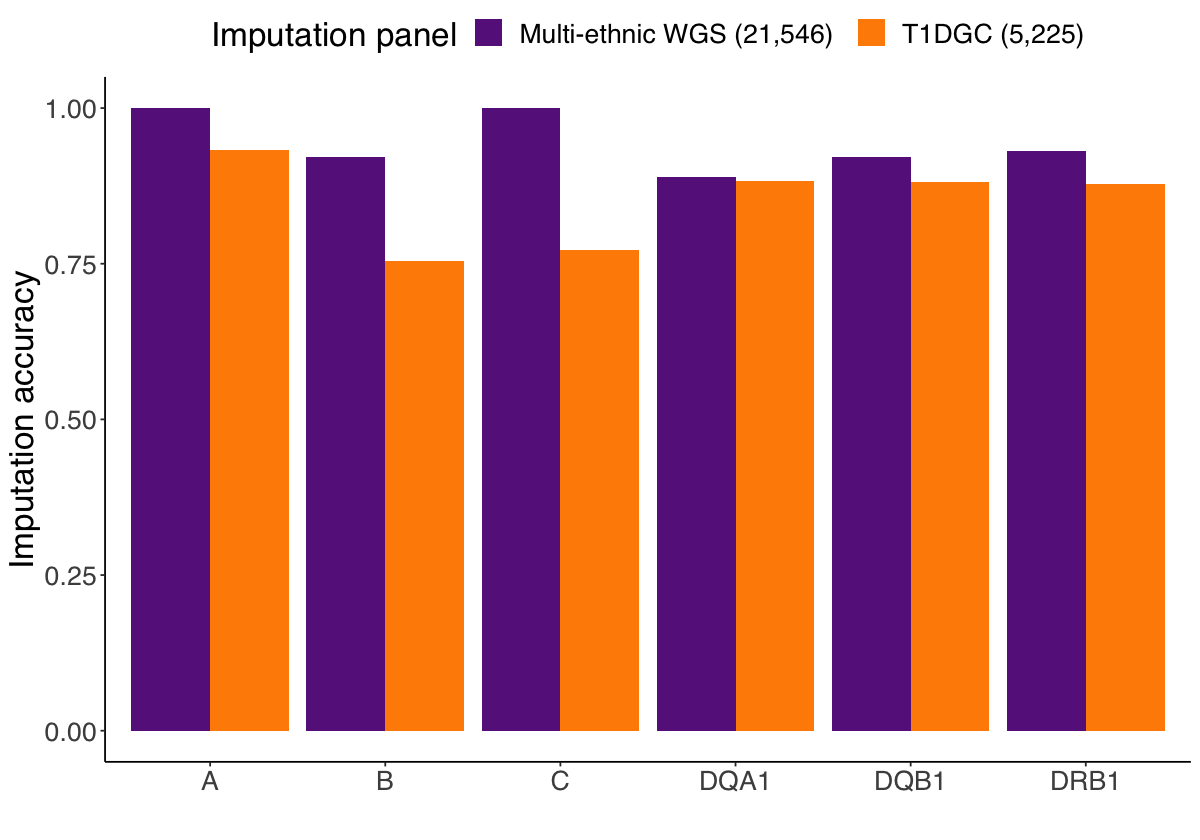

In [110]:
gene.accuracy <- acc.Ggroup %>% group_by(gene) %>%   
  summarize(wgs.mean = mean(wgs.accuracy, na.rm = TRUE), 
            t1dgc.mean = mean(t1dgc.accuracy, na.rm = TRUE))

ggplot(melt(gene.accuracy),aes(x=gene,y=value,fill=variable)) + 
    geom_bar(stat = "identity", position = "dodge") +
    scale_fill_manual(name="Imputation panel",values=panel_colors[c(1,3)],labels=panel_names[c(1,3)])+
                       xlab("") + ylab("Imputation accuracy") + theme(legend.position = "top")

ggsave("../figs/SF3_GaP_imputation_accuracy.png",width=8,height=7)

In [ ]:
genes <- unlist(lapply(rownames(wgs.acc.Ggroup), function(x) unlist(strsplit(split = "\\*",x = x))[1]))

acc.Ggroup <- data.frame(allele = rownames(wgs.acc.Ggroup), 
                         gene = as.vector(genes),
                         wgs.accuracy = wgs.acc.Ggroup$accuracy,
                        t1dgc.accuracy = t1dgc.acc.Ggroup$accuracy,
                        freq = wgs.acc.Ggroup$freq)

gene.accuracy <- acc.Ggroup %>% group_by(gene) %>%   
  summarize(wgs.mean = mean(wgs.accuracy, na.rm = TRUE), 
            t1dgc.mean = mean(t1dgc.accuracy, na.rm = TRUE))

ggplot(melt(gene.accuracy),aes(x=gene,y=value,fill=variable)) + 
    geom_bar(stat = "identity", position = "dodge") +
    scale_fill_manual(name="Imputation panel",values=panel_colors[c(1,3)],labels=panel_names[c(1,3)])+
                       xlab("") + ylab("Imputation accuracy") + theme(legend.position = "top")


## Effect of 97Val (SF4)

Warning message:
“Ignoring unknown aesthetics: width”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


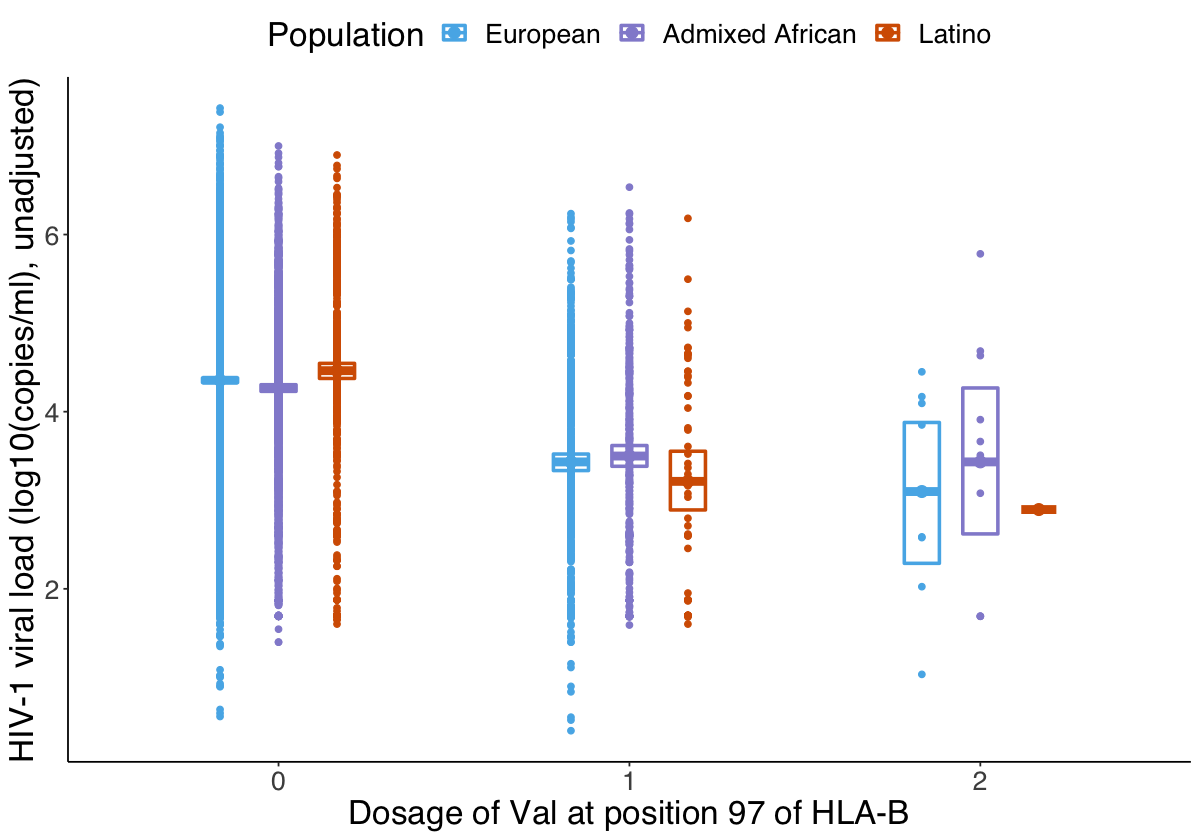

In [18]:
eur <- read.table("..//data/EUR.raw",h=T,stringsAsFactors = F)
aa <- read.table("../data/AFR.raw",h=T,stringsAsFactors = F)
lat <- read.table("../data/LAT.raw",h=T,stringsAsFactors = F)

eur[,9] <- 2-eur[,9] # different minor allele for R
names(eur)[9]<- names(aa)[9]
df <- rbind(cbind(eur,pop="EUR"),cbind(aa,pop="AA"),cbind(lat,pop="LAT"))

plt.df <- df %>% select(colnames(df)[!grepl("HET",colnames(df))]) %>% filter(PHENOTYPE!=-9) 
names(plt.df)[7:12]<-c("N","R","S","T","V","W")

p <- ggplot(plt.df %>% select("PHENOTYPE","V","pop"), aes(x=as.factor(V), y=PHENOTYPE)) +
    ylab("HIV-1 viral load (log10(copies/ml), unadjusted)") + xlab("Dosage of Val at position 97 of HLA-B")+
theme(legend.position="top") 

p_point <- p + geom_point(position = position_dodge(.5),aes(color=pop))
p_point <- p_point  + stat_summary(fun.data = mean_cl_boot, geom = "crossbar", aes(width=0.3,colour = pop), size=1,position=position_dodge(0.5)) + 
  stat_summary(fun.y = mean, geom = "point", aes(colour = pop),size=3,position=position_dodge(0.5))



p_point <- p_point +  scale_colour_manual(values=pop_colors[c(3,1,4)],
                          labels=pop_labels[c(3,1,4)],
                    name = "Population")  

p_point
ggsave(p_point, filename="../figs/SF4_97V_dosage.png", height = 7, width = 8)


## reported amino acid frequencies (SF5)

Warning message in melt(df):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(df). In the next version, this warning will become an error.”
Using pos as id variables



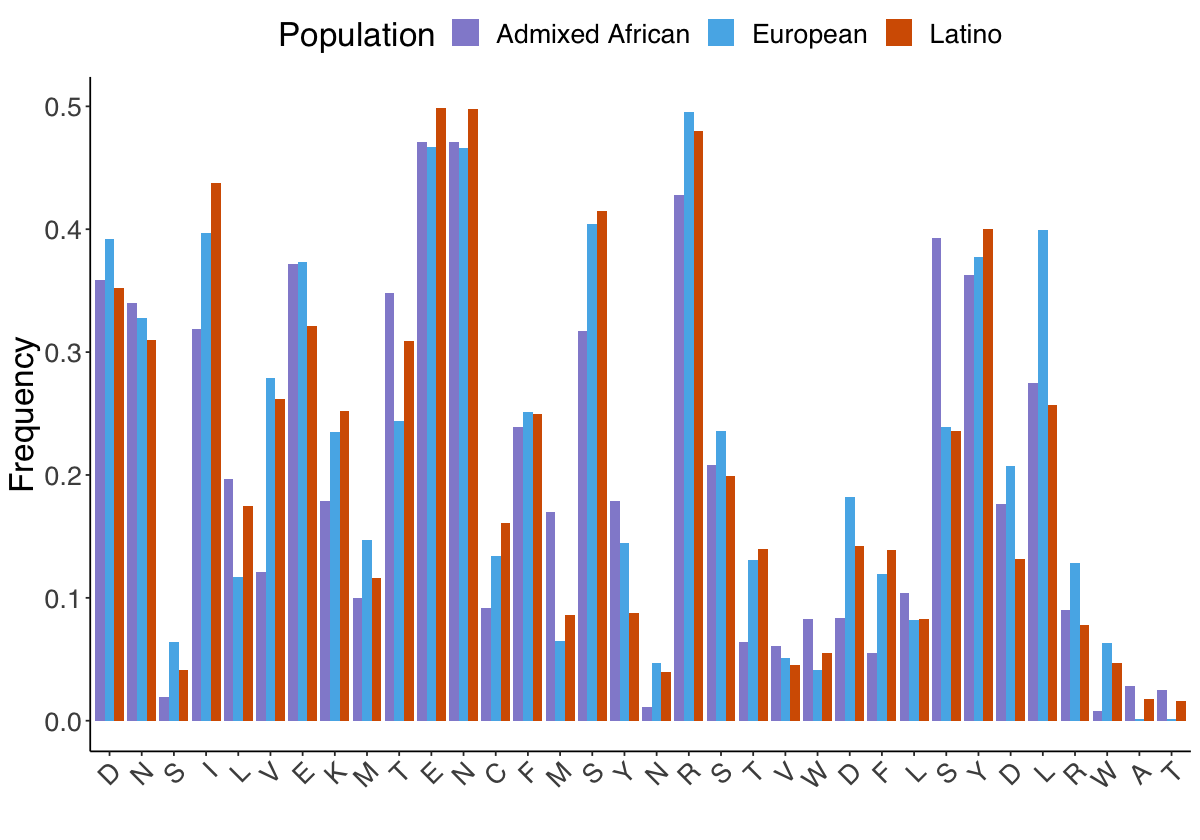

In [5]:
frq <-read.table("../data/HIV_AA_freqs.txt",h=T,stringsAsFactors = F)

df <- data.frame(pos=paste(frq$gene,frq$residue,frq$amino_acid,sep="-"),
                 AA=frq$AA,EUR=frq$EUR,LAT=frq$LAT)

plt.df <- melt(df)

plt.df$pos <- factor(plt.df$pos,levels = levels(plt.df$pos)[c(1:6,18:35,7:17)])

xlabels <- c(frq[frq$residue==77,3],frq[frq$residue==95,3],
                      frq[frq$residue==45,3],frq[frq$residue==63,3],
                      frq[frq$residue==67,3],frq[frq$residue==97,3],
                      frq[frq$residue==116,3],frq[frq$residue==156,3],frq[frq$residue==245,3])


plt.frq <- ggplot(plt.df,aes(x=pos,y=value,fill=variable))+
  geom_bar(stat ="identity", position = "dodge") +
  scale_fill_manual(values=pop_colors[c(1,3,4)],
                          labels=pop_labels[c(1,3,4)],
                    name = "Population")

plt.frq <- plt.frq + theme(axis.text.x=element_text(angle=45, hjust=1),legend.position="top") +
  ylab("Frequency") + xlab("") 

plt.frq + scale_x_discrete(labels=xlabels)

ggsave("../figs/SF5_hiv_res_freq.pdf",width=15,height=8)

## spVL of all haplotypes (SF6)

In [33]:
tidyData <- function(pop="eur",haplo = read.table("../data/haplo.3.txt",sep=",",h=F,stringsAsFactors = F )){
  # read in data
  fname <- paste("../data/",pop,".3.phased.gz",sep="")
  x<-read.table(fname,h=F,stringsAsFactors = F)
  sample <- scan(paste("../data/",pop,".header",sep=""),as.character())
  phenoALL <- read.table(paste("../data/",pop,".pheno",sep = ""),h=F,stringsAsFactors = F)
  pheno <- phenoALL %>% filter(V1 %in% sample) %>% filter(V3!=-9)
  plt.df <- NULL
  for (i in c(1:nrow(haplo))){
    geno <- t(x[x[,2] %in% haplo[i,],])
    resString <- paste(apply(haplo[i,],2,function(x){paste(unlist(strsplit(x,"_"))[c(3,6)],collapse = "")}),collapse = "-")
    #print(resString)
    plt.df <- rbind(plt.df,data.frame(sample=pheno$V1,vl=pheno$V3,res=resString,
                                      present=ifelse(pheno$V1 %in% sample[rowSums(geno == "T") == 3],1,0),
                                      pop=pop)
    )
  }
  return(plt.df)
}

plt.df <- rbind(tidyData(pop="aa"),tidyData(pop="eur"),tidyData(pop="lat"))


Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“Removed 3744 rows containing non-finite values (stat_summary).”
Warning message:
“Removed 3744 rows containing non-finite values (stat_summary).”
Warning message:
“Removed 3744 rows containing non-finite values (stat_summary).”
Warning message:
“Removed 3744 rows containing non-finite values (stat_summary).”


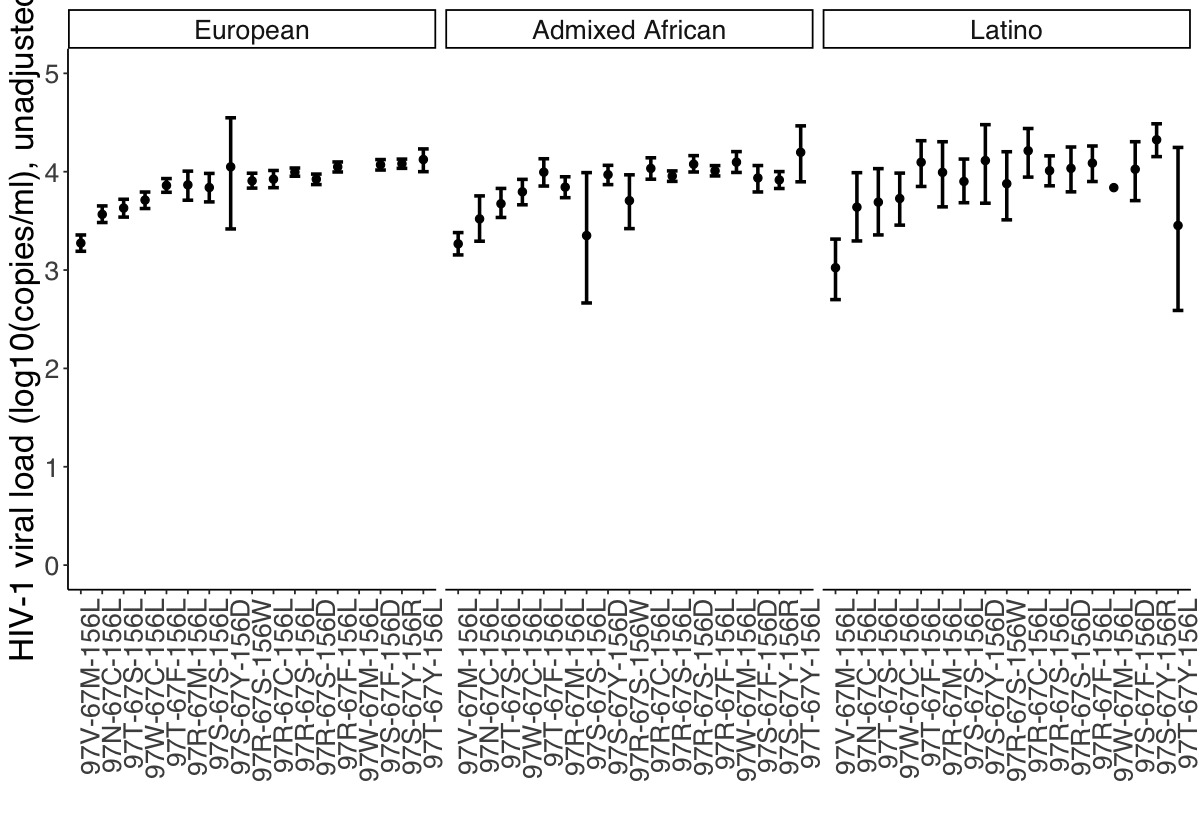

In [34]:
plt.df$pop <- factor(plt.df$pop,levels=c("eur","aa","lat"))

p <- ggplot(plt.df %>% filter(present==1), 
            aes(reorder(res,vl,FUN=median),y=vl)) 
#p <- p +  geom_boxplot(outlier.shape = NA) + theme_bw() 
p <- p  + stat_summary(fun.data = mean_cl_boot, geom = "errorbar", aes(width=0.5),colour = "black", size=1) + 
  stat_summary(fun.y = mean, geom = "point", colour = "black",size=2)
#p <- p + geom_violin()+ theme_bw()

# New facet label names for populations
pop.labs <- c("Admixed African", "European","Latino")

names(pop.labs) <- c("aa", "eur","lat")
p <- p + facet_grid(~pop,labeller = labeller(pop=pop.labs)) + ylim(0,5)

p + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
  xlab("") + ylab("HIV-1 viral load (log10(copies/ml), unadjusted)")

ggsave("../figs/SF6_haplotype_spVL.png", height = 8, width = 12)


## multi-ethnic amino acid effect size (SF7)

Warning message:
“Removed 33 rows containing missing values (geom_errorbarh).”
Warning message:
“Removed 33 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 33 rows containing missing values (geom_point).”
Warning message:
“Removed 33 rows containing missing values (geom_errorbarh).”
Warning message:
“Removed 33 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 33 rows containing missing values (geom_point).”


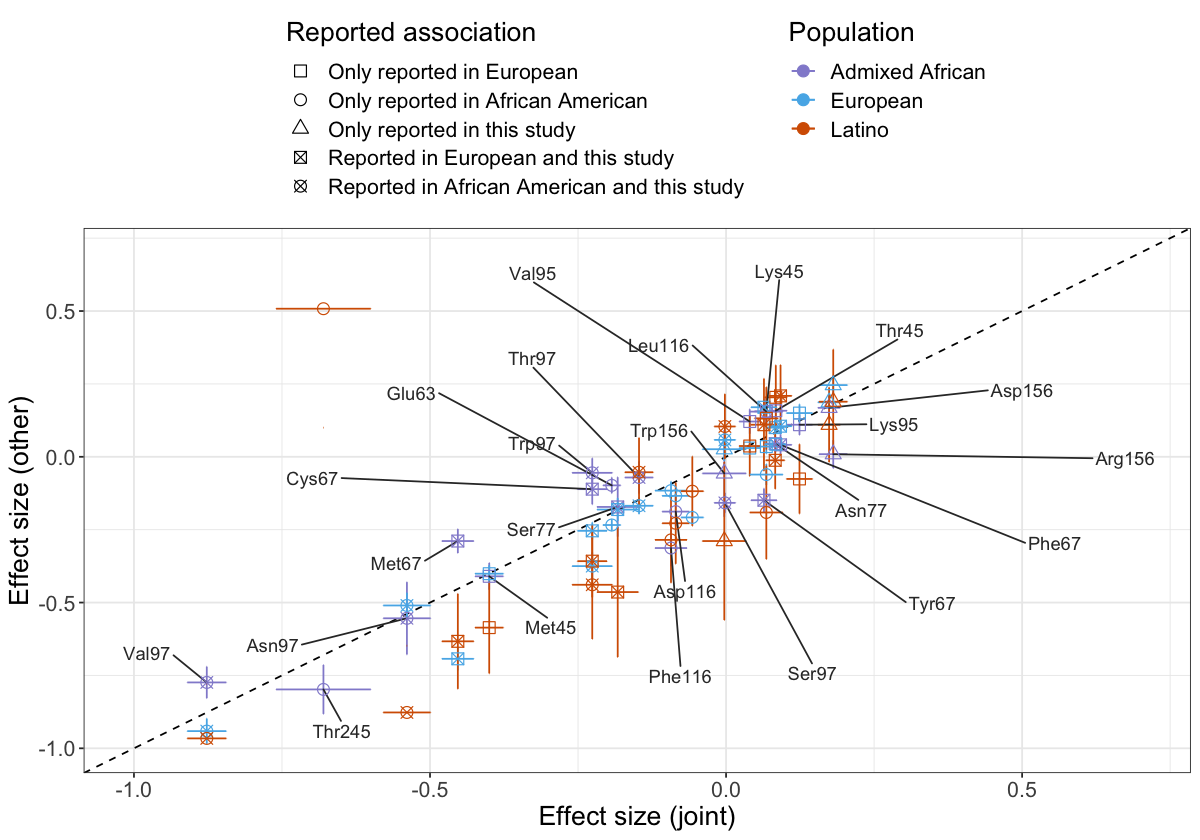

In [14]:
df <-read.table("../data/HIV_AA_summary.txt",h=T,stringsAsFactors = F)

df$label <- paste(df$aa_name,df$res,sep="")
df$reported <- paste(df$Current,df$McLaren_2012_AA,df$McLaren_2015_Euro,sep="")

df.plt = data.frame(AA = c(df$label,rep("", nrow(df)), rep("", nrow(df))),
                x = rep(df$joint_beta, 3),
                x.se = rep(df$joint_se, 3),
                y = c(df$aa_beta, df$eur_beta, df$lat_beta),
                y.se = c(df$aa_se, df$eur_se, df$lat_se),
                pop = rep(c("AA", "EUR" ,"LAT"), each = nrow(df)),
                reported = rep(df$reported,3))

plt =
  df.plt %>% # filter(reported=="100" | reported=="110"| reported=="101") %>%
  ggplot(aes(x, y, shape = as.factor(reported), colour=pop)) +
  geom_abline(slope = 1, intercept = 0, linetype="dashed") +
  geom_errorbar(aes(ymin = y - y.se, ymax = y + y.se)) +
  geom_errorbarh(aes(xmin = x - x.se, xmax = x + x.se)) +
  geom_text_repel(aes(label = AA), show.legend = F, box.padding = 1.5, col = "grey20") +
  geom_point(size=3) +
  xlab('Effect size (joint)') +ylab('Effect size (other)')+
  theme_bw() +
  theme(text = element_text(size = 16))


pop_colors <- c("#938dd2","#56B4E9","#D55E00")
pop_labels <- c("Admixed African","European","Latino")


plt + xlim(-1,0.7) + ylim(-1,0.7) +
  scale_color_manual(values=pop_colors,
                    labels=pop_labels,
                    name = "Population") +
  scale_shape_manual(values=c(0,1,2,7,13,18),labels = c("Only reported in European",
                                                     "Only reported in African American",
                                                     "Only reported in this study",
                                                     "Reported in European and this study",
                                                    "Reported in African American and this study",
                                                   "ALL"),
                     name = "Reported association") +
  theme(legend.position = "top",legend.direction = "vertical")


ggsave("../figs/SF7_HIV_aa_comparison.pdf",height=8,width=8)


###  1000 PC (SF8)


In [35]:
## Get data (pairwise IBD using beagle)
ibd <- read.table("../data/deep1000Gibd.txt.gz", row.names = 1, header = T, stringsAsFactors = F)
sampleInfo <- read.table("../data/g1k_samples.txt",header = T, stringsAsFactors = F )
mhc <- ibd[row.names(ibd) %in% sampleInfo$sample,names(ibd) %in% sampleInfo$sample]
mhc_scale <- scale(mhc)
# calculate PCs
mhc.pca <- rsvd(as.matrix(mhc_scale), k=30)
x <- rpca(as.matrix(mhc_scale), k=30)

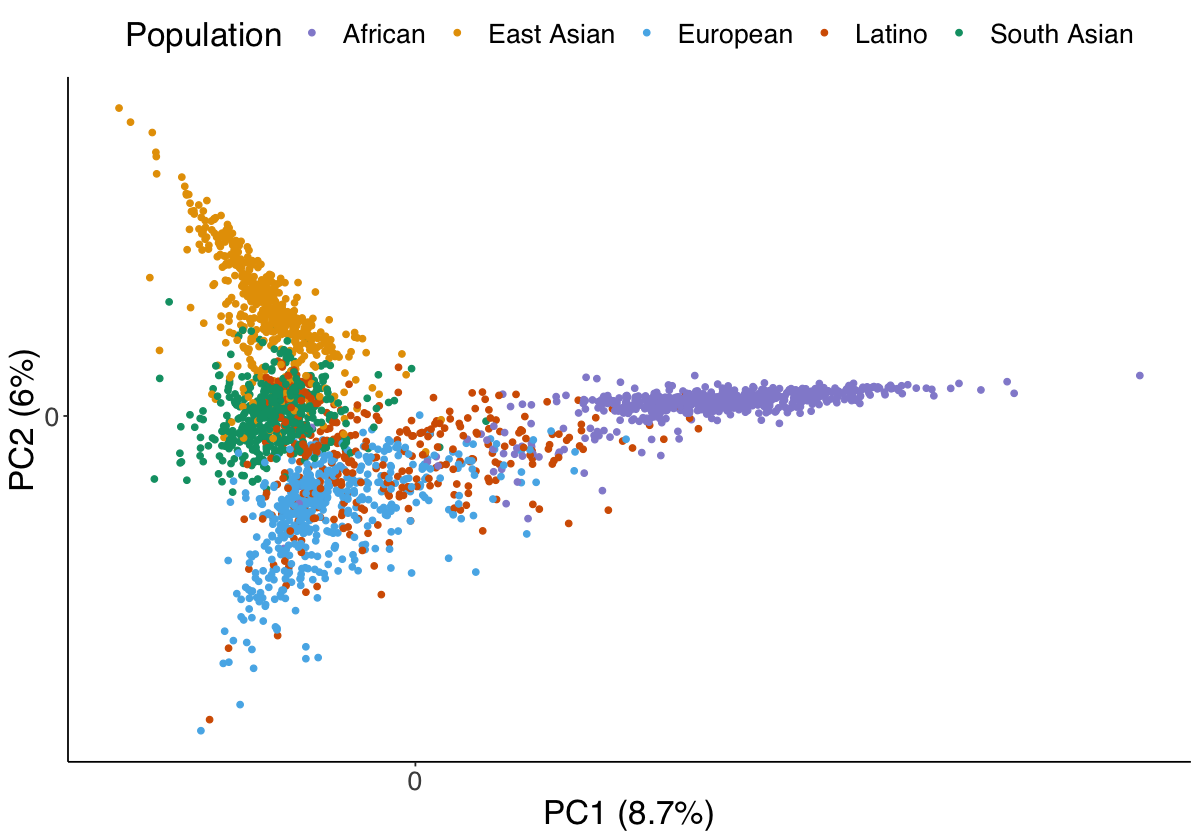

In [41]:
# getting variance explained from rpca function
varexp <- summary(x)[3,1:2]*100

dfplt <- as.data.frame(mhc.pca$u[,1:5])

dfplt$ancestry <- sampleInfo[match(row.names(ibd),sampleInfo$sample),]$super_pop

dfplt[dfplt$ancestry=="AMR",]$ancestry <- "LAT"
g1k.pc.plt <- ggplot(dfplt,aes(V1,V2,colour=ancestry))+geom_point()
g1k.pc.plt <- g1k.pc.plt + scale_color_manual(values = pop_colors,
                                              name="Population",labels=c("African","East Asian","European","Latino","South Asian")) + 
    xlab(paste("PC1 (",round(varexp[1],2),"%)",sep=""))+ylab(paste("PC2 (",round(varexp[2],2),"%)",sep=""))


g1k.pc.plt <- g1k.pc.plt + theme(legend.position="top",
                        plot.background=element_blank(),
                        text = element_text(family = "sans")) 

g1k.pc.plt + scale_x_continuous(breaks = 0) + scale_y_continuous(breaks = 0)

ggsave(filename = "../figs/SF8a_G1K-PCA.png",height=8,width=9)

### UMAP (SF8b)

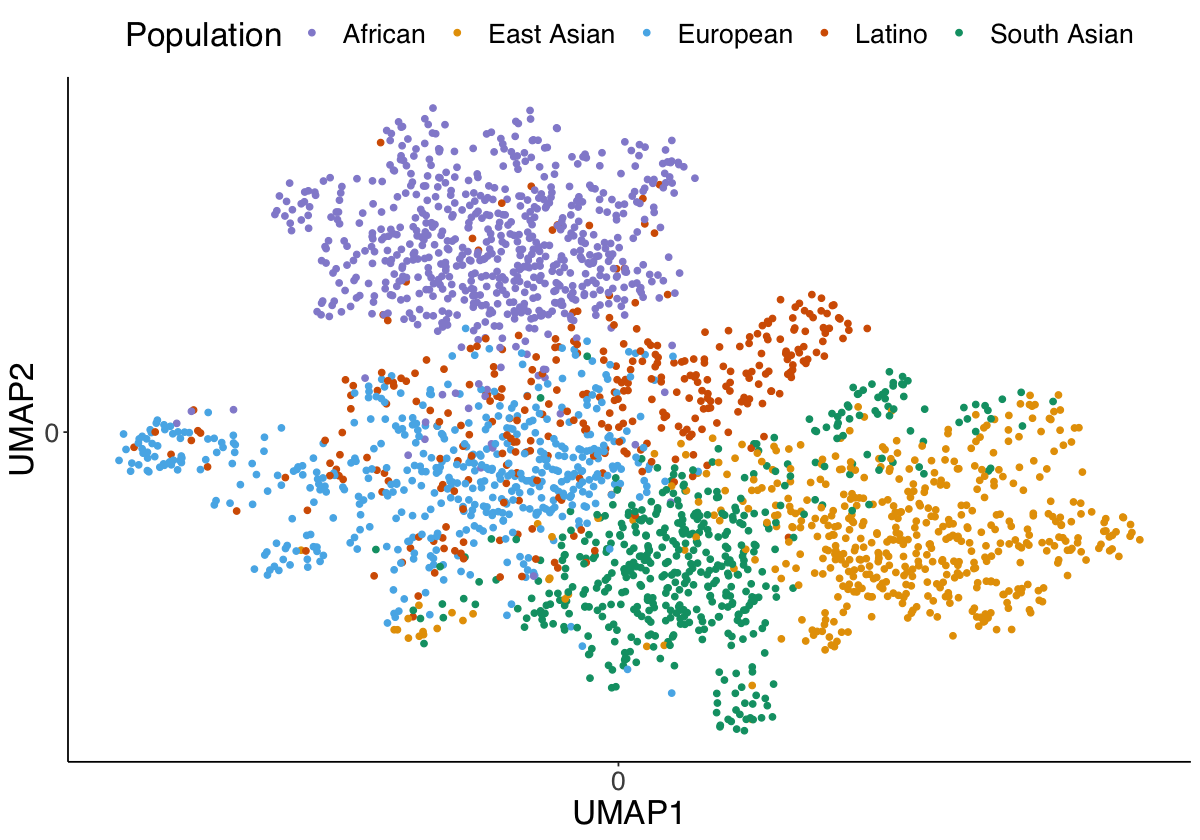

In [42]:
g1k.umap <- umap(mhc_scale,min_dist=0.9,n_neighbors=250)
umap.plt <- data.frame(g1k.umap$layout)

umap.plt $ancestry <- sampleInfo[match(row.names(umap.plt ),sampleInfo$sample),]$super_pop
umap.plt[umap.plt$ancestry=="AMR",] $ancestry <- "LAT"

g1k.umap.plt <- ggplot(umap.plt ,aes(X1,X2,colour=ancestry))+geom_point()
g1k.umap.plt <- g1k.umap.plt + scale_color_manual(values = pop_colors,
                                  name="Population",labels=c("African","East Asian","European","Latino","South Asian")) + 
     xlab("UMAP1") + ylab("UMAP2")

g1k.umap.plt <- g1k.umap.plt + theme(legend.position="top",
                        plot.background=element_blank(),
                        text = element_text(family = "sans"))
g1k.umap.plt + scale_x_continuous(breaks = 0) + scale_y_continuous(breaks = 0)

ggsave(filename = "../figs/SF8b_G1K-UMAP.png",height=8,width=9)

## Heterogeneity of observed common G-group alleles (SF9)

In [18]:
allele.summary <- read.table("../data/Ggroup_allele_summary.txt.gz",h=T,stringsAsFactors = F)
allele.summary$Gene <- sapply(strsplit(allele.summary[,1], "\\*"), "[[", 1)

# alleles show significant difference among population groups (stratified by frequency)

n <- nrow(allele.summary[allele.summary$Freq >= 0.005,])

allele.summary$label <- ifelse(allele.summary$Pval>=0.05/n,allele.summary$Allele,"")
allele.summary[allele.summary$Allele=="B*53:01:01G",]$label <- "B*53:01:01G"
# to make all <10^-300 points to be 300 for plotting
allele.summary$P <- ifelse(-log10(allele.summary$Pval)>=300, 1e-300, allele.summary$Pval)


###  the log10(frequency) of all G-group alleles (SF4a)

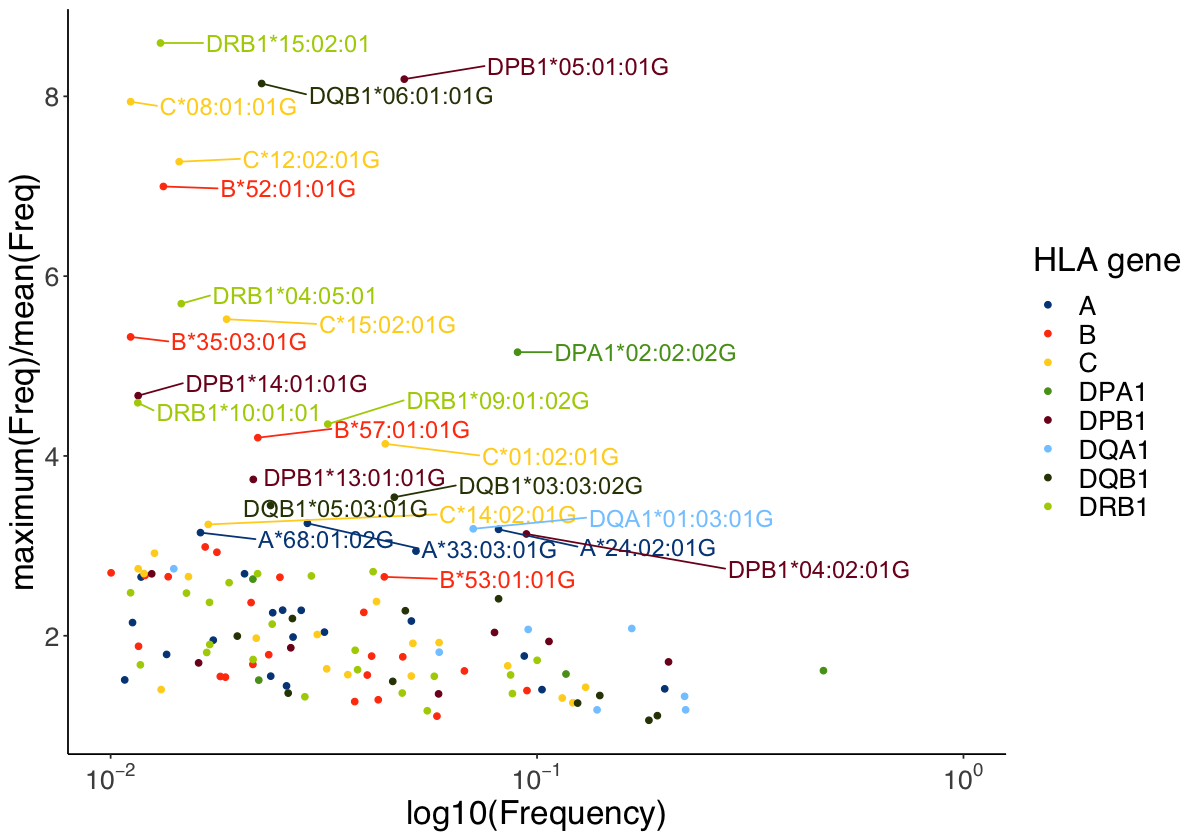

In [20]:
allele.summary[is.na(allele.summary)] <- 0
df <- allele.summary %>% rowwise() %>% mutate(maxFreq=max(EURfreq,AAfreq,LATfreq,SASfreq,EASfreq)) %>%
    mutate(diffFreq = maxFreq/Freq)


df$label <- ifelse(df$diffFreq>3,df$Allele,"")
df[df$Allele=="B*53:01:01G",]$label <- "B*53:01:01G"

p <- ggplot(df %>% filter(Freq>0.01),aes(log10(Freq),diffFreq, color = Gene,
                                                     label=label))+geom_point() 

p <- p + scale_x_continuous(name = "log10(Frequency)",breaks=c(-2, -1, 0),
                       labels=c(expression(10^-2),expression(10^-1),expression(10^0)),
                            limits = c(-2,0))

p <- p + theme(plot.background=element_blank(),
                        text = element_text(size=20, family = "sans")) +
 scale_y_continuous(name = "maximum(Freq)/mean(Freq)") 


p + scale_colour_calc(name="HLA gene") + geom_text_repel(segment.size  = .5,nudge_x = 0.3,
                                                         size=5, show.legend = FALSE) 

ggsave("../figs/SF9a_Ggroup_maxvsmeanfreq_by_freq.pdf",width=10,height=7)

### the -log10(P-value) of chi-square statistics obtained from a 3x5  contingency table (SF9b)

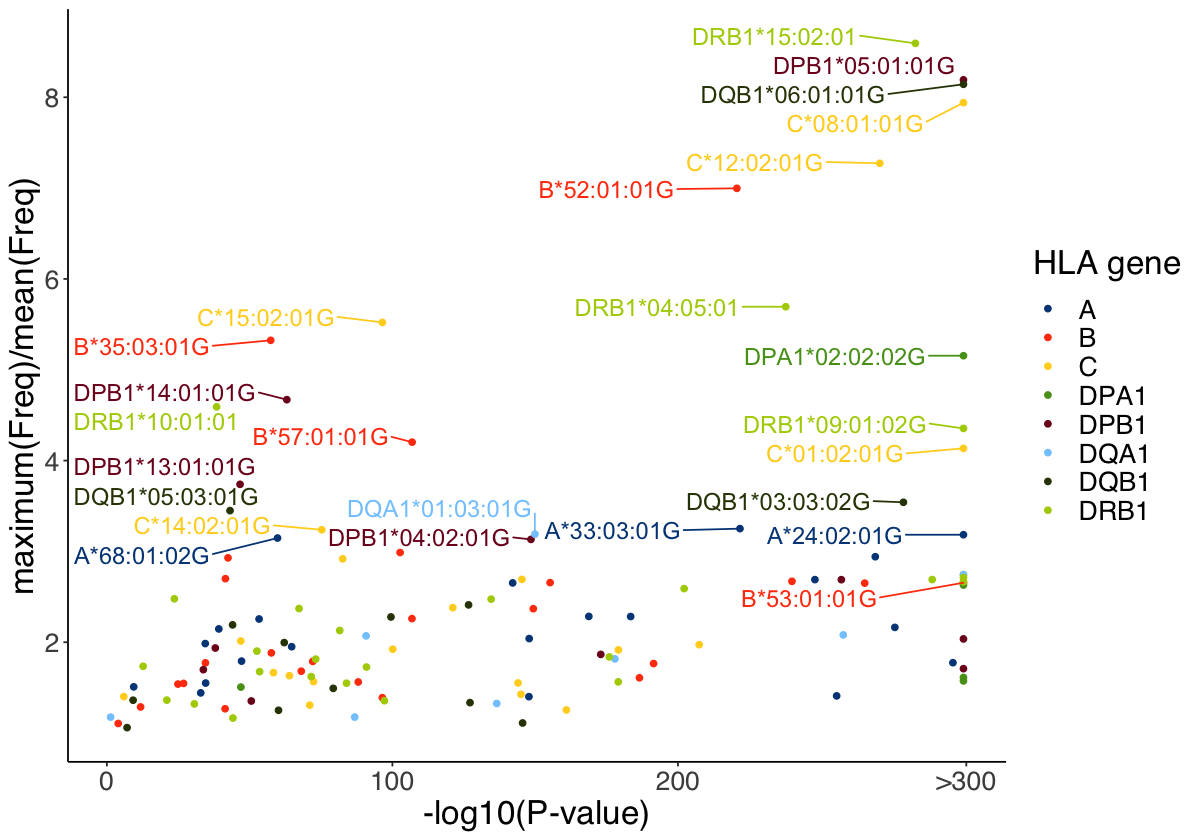

In [22]:
p <- ggplot(df %>% filter(Freq>0.01),aes(-log10(P),diffFreq, color = Gene,
                                                     label=label))+geom_point()  


p <- p + theme(plot.background=element_blank(),
                        text = element_text(size=20, family = "sans")) +
 scale_y_continuous(name = "maximum(Freq)/mean(Freq)") +
 scale_x_continuous(name = "-log10(P-value)",breaks=c(0,100,200,301),labels = c(0,100,200,">300")) 



p + scale_colour_calc(name="HLA gene") + geom_text_repel(segment.size  = .5, nudge_x = -45,
                                                         size=5,show.legend = FALSE) 

ggsave("../figs/SF9b_Ggroup_maxvsmeanfreq_by_pval.pdf",width=10,height=7)


## Number of observed G-group alleles (SF10)

[1] 1532   13

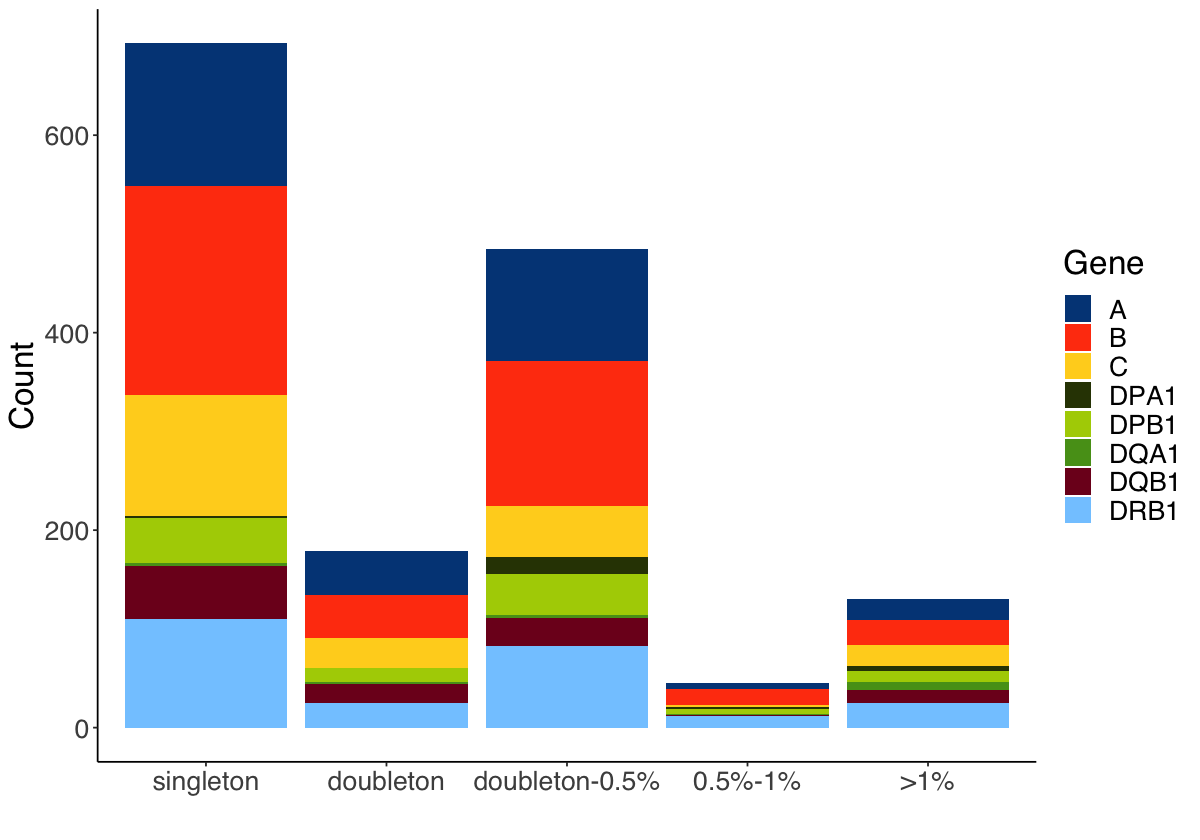

In [26]:
n <- 21546 # totoal number of individuals

freq.bin <- c(0,1/n/2,1/n,0.005,0.01,1)

x <- allele.summary %>%
  group_by(group = cut(Freq, breaks = freq.bin))
dim(allele.summary)

count.df <- x %>% group_by(group,Gene) %>% count(group)

p <- ggplot(count.df,aes(x=group, y=n, fill=Gene)) + geom_bar(stat='identity') +
     xlab("") + ylab("Count")

p +  scale_x_discrete(labels=c("singleton", "doubleton",
                               "doubleton-0.5%","0.5%-1%",">1%")) +
     scale_fill_manual(values = gene_colors)

ggsave('../figs/SF10_Ggroup_freq_count.pdf',width=10,height=7)


## Pairwise LD measurement index (SF11)

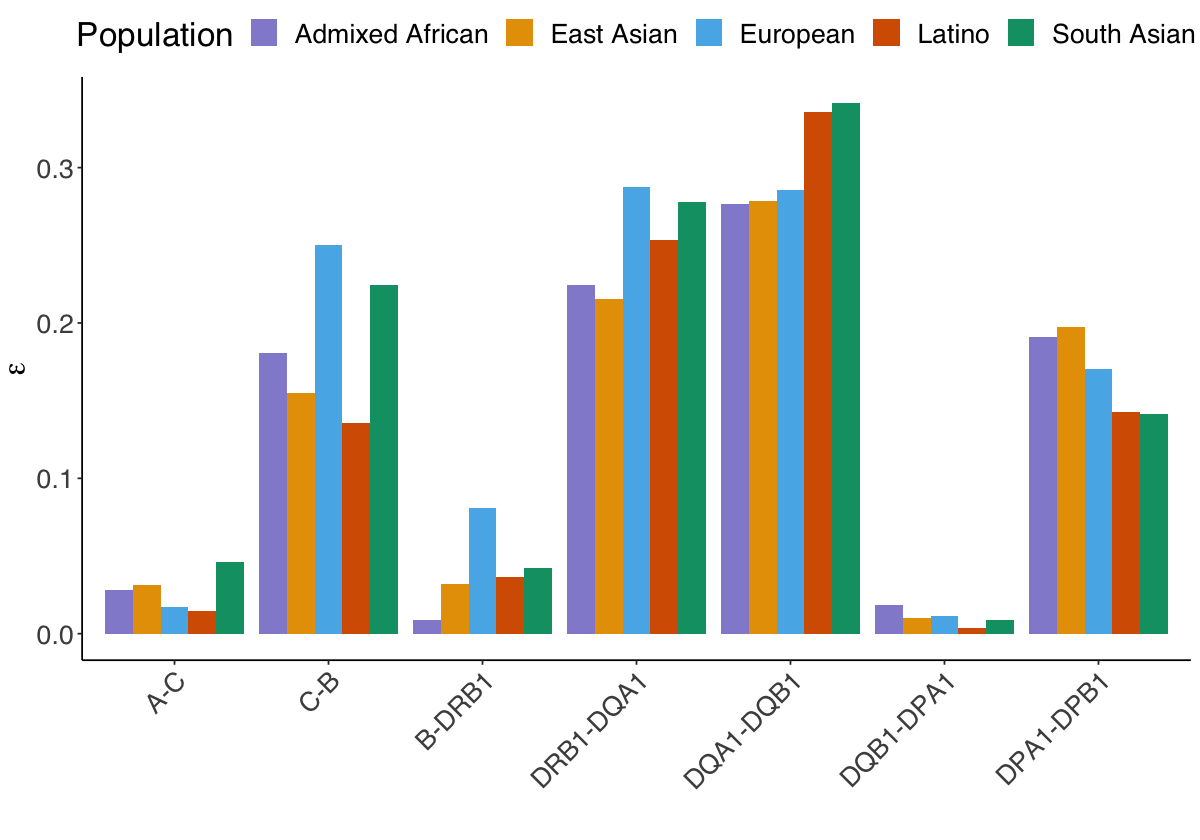

In [29]:
epsilon <- NULL
pop <- "AA"
    M<-read.table(paste("../data/",pop,"_eps.txt",sep=""),h=T,stringsAsFactors = F)
    for (i in 1:7){
        epsilon <- c(epsilon, M[i+1,i])
    }
    epsilon <- as.data.frame(epsilon)
    epsilon$gene <- c("A-C","C-B","B-DRB1","DRB1-DQA1","DQA1-DQB1","DQB1-DPA1","DPA1-DPB1")

    names(epsilon)[1] <- pop

for (pop in c("EAS","EUR","LAT","SAS")){
    M<-read.table(paste("../data/",pop,"_eps.txt",sep=""),h=T,stringsAsFactors = F)
    X<- NULL
    for (i in 1:7){
        X <- c(X, M[i+1,i])
    }
    epsilon <- cbind(X, epsilon)

    names(epsilon)[1] <- pop
}

df.plt <- epsilon %>% gather(variable, value, -gene)
df.plt$gene <- factor(df.plt$gene, levels=c("A-C","C-B","B-DRB1","DRB1-DQA1","DQA1-DQB1","DQB1-DPA1","DPA1-DPB1"))
p <- ggplot(df.plt,aes(x=gene,y=value,fill=variable)) + geom_bar(stat = "identity", position=position_dodge())

p <- p + xlab("")+ylab(expression(epsilon)) + 
scale_fill_manual("Population",labels = pop_labels, values = pop_colors)

p + theme(axis.text.x=element_text(angle=45, hjust=1),legend.position="top")
ggsave("../figs/SF11_epsilon_pairs.pdf",width=10,height=7)


## MESA PCA (SF17)

In [30]:
yy<-read.table("../data/MESA.predpc",h=F,stringsAsFactors = F)
df <- data.frame(yy)
eigenval<-scan("../data/MESA.eigenval",as.numeric())
val<-eigenval/sum(eigenval)*100

In [31]:
# classify ancestry based on projected PCs:
df$Ethnicity <- NA
df[df$V5 > 0.057,]$Ethnicity <- "European"
df[df$V4 > 0.028,]$Ethnicity <- "Asian"
#df[(df$V4 < 0.002 ) ,]$Ethnicity<-"African American"
df[df$V4>0.002 & df$V4< 0.028 & df$V5< 0.057,]$Ethnicity<-"Latino"
df[is.na(df$Ethnicity),]$Ethnicity <- "African American"
#re-classifying some other points
df[df$Ethnicity=="African American" & df$V6<0.4 & df$V5 <0.025,]$Ethnicity <- "Latino"
#df[df$Ethnicity=="African American" & df$V5 < 0.0 & df$V4 > -0.04,]$Ethnicity <- "Latino"
df[df$Ethnicity=="African American" & df$V4 > 0.0 & df$V5 < 0.03,]$Ethnicity <- "Latino"
df[df$Ethnicity=="Latino" & df$V4 < -0.005 & df$V5 > -0.001,]$Ethnicity <- "African American"


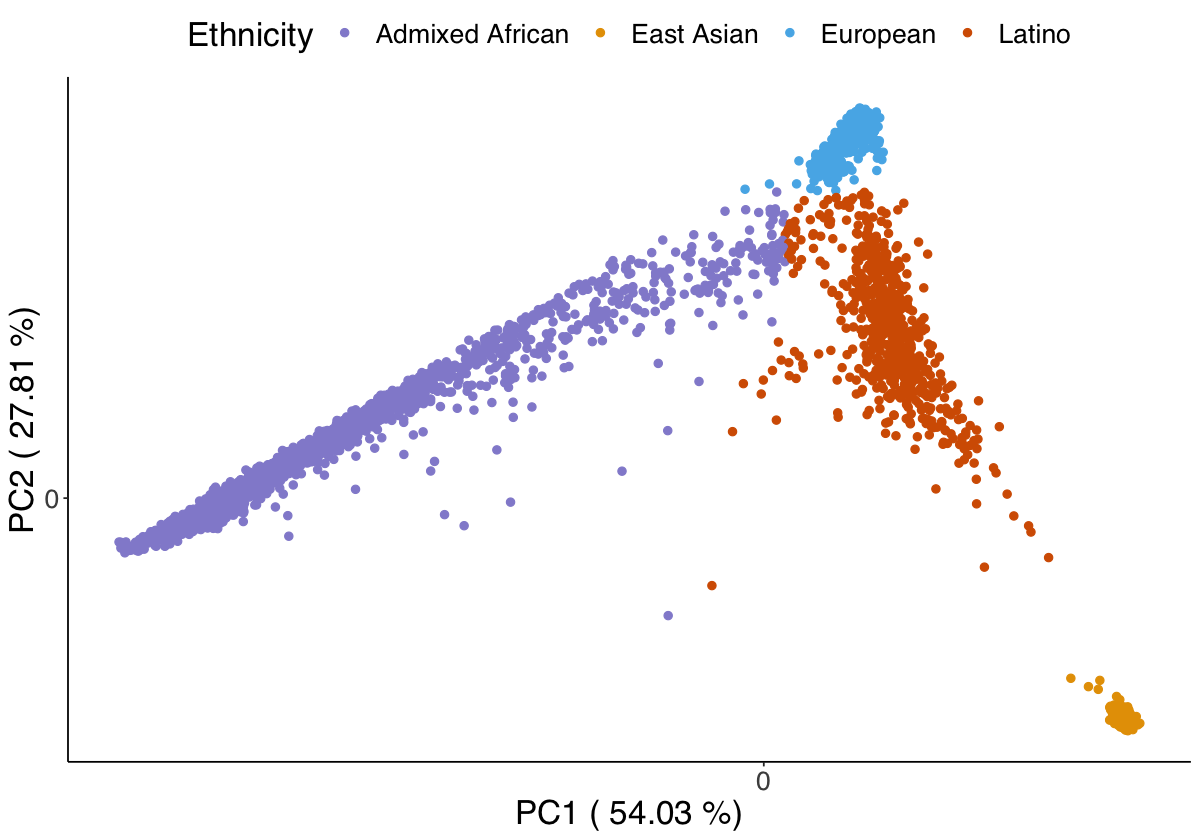

In [43]:
mesaPCs <- ggplot(na.omit(df),aes(x=V4,y=V5,colour=Ethnicity))+geom_point(size=2)+
  xlab(paste("PC1 (",round(val[1],2),"%)"))+ylab(paste("PC2 (",round(val[2],2),"%)"))+
  scale_color_manual(values=pop_colors,
                     labels=pop_labels)
mesaPCs <- mesaPCs + theme(legend.position="top",
                        plot.background=element_blank(),
                        text = element_text(family = "sans")) 

mesaPCs + scale_x_continuous(breaks = 0) + scale_y_continuous(breaks = 0)
ggsave("../figs/SF17_MESA-PCA.png", height = 8, width = 8)

## Beagle versus Minimac4 (SF18)

In [45]:
beagle <- read.table("../data/beagle.txt.gz",h=F,stringsAsFactors = F)
minimac <- read.table("../data/minimac4.txt.gz",h=F,stringsAsFactors = F)




In [48]:
# allele frequency concordance
af <- data.frame(pos=minimac$V1,ID=beagle$V1,minimac=minimac$V2,beagle=beagle$V2,
                 minimacR2=minimac$V3,beagleR2=beagle$V3)

af$TYPE <- "intergenic"

af$TYPE <- ifelse(str_detect(af$ID,"^AA"),"AA",af$TYPE)
af$TYPE <- ifelse(str_detect(af$ID,"^HLA"),"HLA",af$TYPE)
af$TYPE <- ifelse(str_detect(af$ID,"^SNP"),"SNP",af$TYPE)

### Per sample concordance rate (SF18a)

In [76]:
# per sample
concordance <- NULL
idxs <- which(af$TYPE!="intergenic")
for (j in c(4:ncol(beagle))){
  concordance <- c(concordance,cor(beagle[idxs,j],minimac[idxs,j]))
}
plt.df <- as.data.frame(concordance)

#ggplot(plt.df,aes(concordance)) + geom_histogram(bins = 100) + 
#     xlab ("Sample concordance") + xlim(c(0,1))
pdf("../figs/SF18a_beagle_vs_minimac_sample_concordance.pdf",width=8,height=8)
hist(concordance,xlim=c(0,1),breaks = 20,freq = TRUE, ylab = "Count",cex.lab=1.5,
     xlab="Sample concordance",main = "")
text(.4,500, paste("median = ",round(median(concordance),3),sep=""), cex=1.5)
dev.off()

pdf 
  2

### Per allele dosage correlation (SF18b)

In [ ]:
options(warn=-1)

idxs <- which(af$TYPE=="SNP" & af$beagle>0.005 & af$minimac >0.005 &
                af$beagleR2>0.5 & af$minimacR2>0.5)
idxs <- which(af$TYPE=="HLA")
length(idxs)

vars <- NULL
for (i in idxs){
  df<-data.frame(beagle=t((beagle[i,-c(1:3)])),minimac=t((minimac[i,-c(1:3)])))
  names(df) <- c("beagle","minimac")
  vars <- rbind(vars,data.frame(ID=af$ID[i],AF=af$beagle[i], minimacR2=af$minimacR2[i], beagleR2=af$beagleR2[i],r=cor(df$minimac,df$beagle),type=af[i,]$TYPE))
}

In [85]:

vars$MAF <- ifelse(vars$AF>0.5, 1-vars$AF,vars$AF)
vars$digits<-sapply(vars$ID,str_count,pattern=":")+1



Warning message:
“Removed 13 rows containing missing values (geom_point).”
Warning message:
“Removed 13 rows containing missing values (geom_point).”


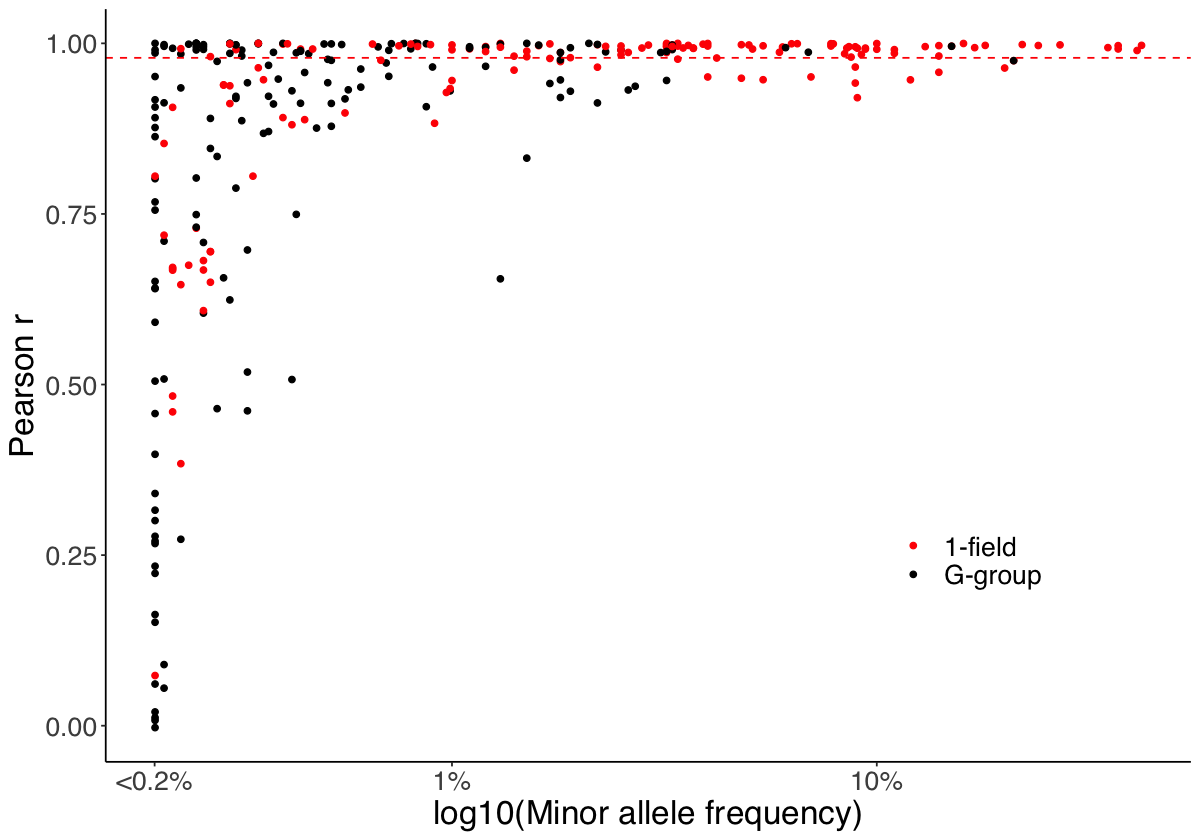

In [89]:
ggplot(vars %>% filter(digits==1 | digits==3), aes(x=log10(MAF),y=r,color=as.factor(digits))) + geom_point() + 
  xlab("log10(Minor allele frequency)") + ylab(expression(paste("Pearson ", r))) +
  geom_hline(yintercept=median(HLAvars$r,na.rm = T), linetype="dashed", color = "red")+
  scale_x_continuous(breaks=c(-2.7,-2,-1,0),labels = c("<0.2%","1%","10%","100%")) +
  scale_color_manual(values=c("red","black"),labels = c("1-field","G-group"),name="") +
  theme(legend.position = c(.8, 0.3))

ggsave("../figs/SF18b_per_allele_dosage_r.png",width=8,height=8)